In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from sklearn.neural_network import MLPRegressor
from math import sqrt
% matplotlib inline

pd.options.display.max_columns = 999
df_s = pd.read_csv("energy_data_variables_final_normalized.csv", usecols = ['DOLLAREL', 'DRYRUSEM', 'USEWASHM', 'TOTROOMS', 'LGTOUTNUM', 'BEDROOMS', 'DRYRFUEL', 'TOTSQFT_EN', 'NUMCFAN', 'TVCOLOR', 'WINDOWS', 'NCOMBATH', 'LGTINNUM', 'ELWATER', 'FUELH2O', 'OTHROOMS', 'WHEATAGE', 'NUMFRIG', 'NHSLDMEM', 'AGERFRI2', 'LOCRFRI2', 'FUELHEAT', 'THERMAINAC', 'NUMFREEZ', 'KWH_M'])

/Users/williamadams/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_s.shape

(5686, 25)

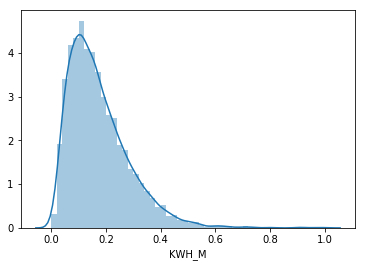

In [3]:
# Check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

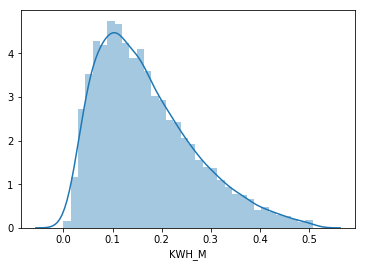

In [4]:
# Remove outliers that are more than 3 standard deviations from the mean 
df_s = df_s[np.abs(df_s["KWH_M"]-df_s["KWH_M"].mean())<=(3*df_s["KWH_M"].std())]

# Re-check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

In [5]:
df_s.shape

(5618, 25)

In [6]:
# Set X, Y Variables

X = df_s.values[:, 0:24]
Y = df_s.values[:, 24]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [7]:
parameters = {'alpha':[5, 10, 100]}
MLP = MLPRegressor(hidden_layer_sizes= [3,3], random_state=42, solver='adam')
grid_obj = GridSearchCV(MLP, parameters, cv=5, scoring='neg_mean_squared_error', verbose = 1)
grid_obj.fit(X, Y)

print("best_index", grid_obj.best_index_)
print("best_score", grid_obj.best_score_)
print("best_params", grid_obj.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.0s finished


best_index 0
best_score -0.005863530777490366
best_params {'alpha': 5}


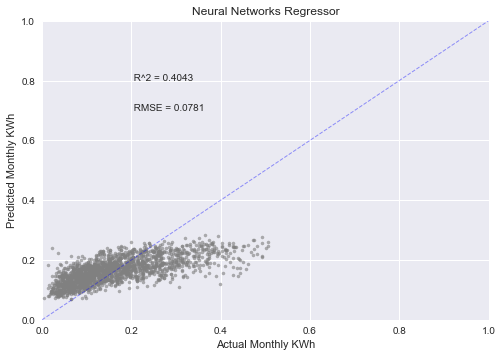

In [8]:
%matplotlib inline
plt.style.use('seaborn')
neural = MLPRegressor(hidden_layer_sizes= [3,], alpha=5, random_state=42, solver='adam')
neural.fit(x_train, y_train)
predicted_neural = neural.predict(x_test)

plt.scatter(y_test, predicted_neural, s = 10, color = 'gray', alpha = 0.6)
plt.plot([0,1], [0,1], "b--", lw=1, alpha=0.4)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.axis([0,1,0,1])
plt.text(0.2,0.8, ' R^2 = {}'.format(round(float(neural.score(x_test,y_test)), 4)))
plt.text(0.2,0.7, ' RMSE = {}'.format(round(sqrt(mean_squared_error(y_test, predicted_neural)), 4)))
plt.title('Neural Networks Regressor')
plt.show()

In [9]:
# Hyper-Parameter Tuning 

parameters = {'alpha':[5, 10, 100]}
MLP = MLPRegressor(hidden_layer_sizes= [3,], random_state=42, solver='sgd')
grid_obj = GridSearchCV(MLP, parameters, cv=5, scoring='neg_mean_squared_error', verbose = 1)
grid_obj.fit(X, Y)

print("best_index", grid_obj.best_index_)
print("best_score", grid_obj.best_score_)
print("best_params", grid_obj.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   11.7s finished


best_index 0
best_score -0.007179849374916405
best_params {'alpha': 5}


/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


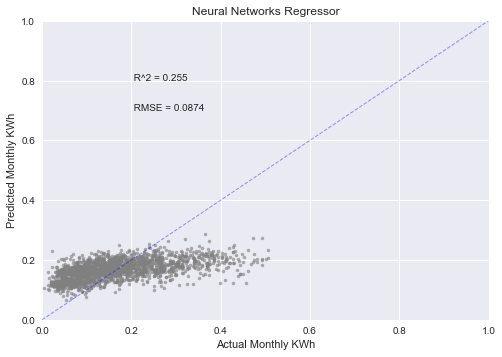

In [10]:
# Modeling w/ Hyper Parameter Tuning

%matplotlib inline
plt.style.use('seaborn')
neural = MLPRegressor(hidden_layer_sizes= [3,], alpha=5, random_state=42, solver='sgd', learning_rate = 'adaptive', activation = 'relu')
neural.fit(x_train, y_train)
predicted_neural = neural.predict(x_test)

plt.scatter(y_test, predicted_neural, s = 10, color = 'gray', alpha = 0.6)
plt.plot([0,1], [0,1], "b--", lw=1, alpha=0.4)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.axis([0,1,0,1])
plt.text(0.2,0.8, ' R^2 = {}'.format(round(float(neural.score(x_test,y_test)), 4)))
plt.text(0.2,0.7, ' RMSE = {}'.format(round(sqrt(mean_squared_error(y_test, predicted_neural)), 4)))
plt.title('Neural Networks Regressor')
plt.show()

In [11]:
# Hyper-Parameter Tuning 

parameters = {'alpha':[5, 10, 100]}
MLP = MLPRegressor(hidden_layer_sizes= [3,], random_state=42, solver='lbfgs', activation = 'relu')
grid_obj = GridSearchCV(MLP, parameters, cv=10, scoring='neg_mean_squared_error', verbose = 1)
grid_obj.fit(X, Y)

print("best_index", grid_obj.best_index_)
print("best_score", grid_obj.best_score_)
print("best_params", grid_obj.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
best_index 0
best_score -0.0019223270617033054
best_params {'alpha': 5}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.4s finished


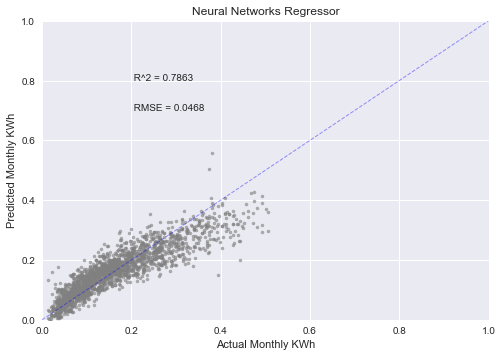

In [12]:
# Modeling w/ Hyper Parameter Tuning

%matplotlib inline
plt.style.use('seaborn')
neural = MLPRegressor(hidden_layer_sizes= [3,], alpha=5, random_state=42, solver='lbfgs', activation = 'tanh')
neural.fit(x_train, y_train)
predicted_neural = neural.predict(x_test)
plt.scatter(y_test, predicted_neural, s = 10, color = 'gray', alpha = 0.6)
plt.plot([0,1], [0,1], "b--", lw=1, alpha=0.4)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.axis([0,1,0,1])
plt.text(0.2,0.8, ' R^2 = {}'.format(round(float(neural.score(x_test,y_test)), 4)))
plt.text(0.2,0.7, ' RMSE = {}'.format(round(sqrt(mean_squared_error(y_test, predicted_neural)), 4)))
plt.title('Neural Networks Regressor')
plt.show()

In [13]:
# Calculate RMSE

MLP = MLPRegressor(hidden_layer_sizes= [3,], alpha=5, random_state=42, solver='lbfgs')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = cross_val_score(MLP, X, Y, cv=shuffle, scoring = "neg_mean_squared_error")
mse_scores1 = -mse_scores 
rmse_scores = np.sqrt(mse_scores1)

print ("The RMSE scores are %s" 
       % (rmse_scores))
print ("The mean of the RMSE scores is %f" 
       %(rmse_scores.mean()))

The RMSE scores are [0.04416877 0.04352877 0.04742509 0.04285636 0.04370541 0.04356675
 0.04274422 0.0417873  0.04621382 0.04204259]
The mean of the RMSE scores is 0.043804


In [14]:
# Calculate MAE 
MLP = MLPRegressor(hidden_layer_sizes= [3,], alpha=5, random_state=42, solver='lbfgs')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
mae_scores = cross_val_score(MLP, X, Y, cv=shuffle, scoring = "neg_mean_absolute_error")
mae_scores_ = -mae_scores

print ("The mean absolute error scores are %s" 
       % (mae_scores_))
print ("The mean of the mean absolute error scores is %f" 
       %(mae_scores_.mean()))

The mean absolute error scores are [0.03256984 0.03257037 0.03399    0.03228289 0.03173153 0.03231115
 0.03132576 0.03108526 0.03457512 0.03091263]
The mean of the mean absolute error scores is 0.032335


In [15]:
# Calculate VAR 

MLP = MLPRegressor(hidden_layer_sizes= [3,], alpha=5, random_state=42, solver='lbfgs')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
ev_scores = cross_val_score(MLP, X, Y, cv=shuffle, scoring = "explained_variance")

print ("The explained variance scores are %s" 
       % (ev_scores))
print ("The mean of the explained variance scores is %f" 
       %(ev_scores.mean()))

The explained variance scores are [0.79884901 0.82210434 0.78774036 0.80310765 0.80056433 0.78430262
 0.80463603 0.83041109 0.78419899 0.8416347 ]
The mean of the explained variance scores is 0.805755


In [16]:
# Calculate R2

MLP = MLPRegressor(hidden_layer_sizes= [3,], alpha=5, random_state=42, solver='lbfgs')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

r_scores = cross_val_score(MLP, X, Y, cv=shuffle, scoring = "r2")

print ("The R2 scores are %s" 
       % (r_scores))
print ("The mean of the R2 scores is %f" 
       %(r_scores.mean()))

The R2 scores are [0.79864505 0.8218368  0.78772266 0.8030884  0.8005269  0.7842691
 0.80431632 0.82996682 0.78381844 0.84162674]
The mean of the R2 scores is 0.805582


Text(0.5,1,'Multi-Layer Perceptron - Artificial Neural Networks')

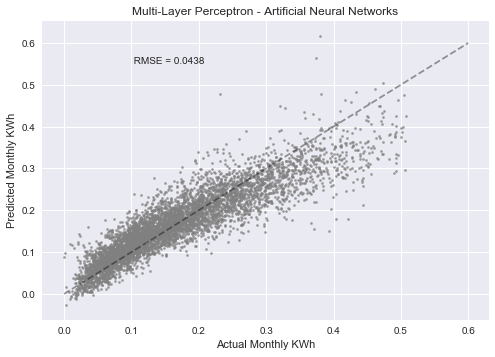

In [17]:
# Plot the Predict vs. Actual Values Using CrossValPredict
from sklearn.model_selection import cross_val_predict
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
predicted_MLP = cross_val_predict(MLP, X, Y, cv=shuffle)

%matplotlib inline
plt.style.use('seaborn')
plt.scatter(Y, predicted_MLP, s = 5, color = 'gray', alpha = 0.8)
plt.plot([0,0.6], [0,0.6], "b--", color = "black", alpha = 0.4)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.text(0.1,0.55, ' RMSE = {}'.format(round(sqrt(mean_squared_error(Y, predicted_MLP)), 4)))
plt.title('Multi-Layer Perceptron - Artificial Neural Networks')